# Clustering

Kümeleme : Datayı benzerliklerine göre gruplara ayırma bu bir denetimsiz öğretim(Unsupervised Learning)

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns',100)  # 100 tane stün gösterir
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('cars.xls')

In [4]:
'''Regression da başarı oranı R2 ve RMSE ile ölçülür
Classificationda başarı oranı Accuracy, F1score ve Confusion Matrix ... ile ölçülür.
Clustering de başarı oranı Silhutte Score ile ölçülür.
Regression ve Classifications rakamların yüksek olması başarı puanının yüksek olması fakat clusteringde düşük olması gereklidir.
'''

'Regression da başarı oranı R2 ve RMSE ile ölçülür\nClassificationda başarı oranı Accuracy, F1score ve Confusion Matrix ... ile ölçülür.\nClustering de başarı oranı Silhutte Score ile ölçülür.\nRegression ve Classifications rakamların yüksek olması başarı puanının yüksek olması fakat clusteringde düşük olması gereklidir.\n'

In [6]:
x=df[['Price','Mileage','Cylinder']]    # Datadan sadece 3 tane stünü aldık
# Amacımız marka modeli olmadan üzerinde ki fiyat km ve silindire bakarak markayı bulabilir mi?

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
# 4 gruba ayıracağız
model=KMeans(4)

In [9]:
model=model.fit(x)    # Burda data hakkında bilgimiz olmadığı için y vs yok

In [10]:
tahmin=model.predict(x)

In [11]:
tahmin   # Datayı benzerliklerine göre gruplara ayırdık

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 2, 3, 2,
       2, 3, 2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

In [12]:
x['cluster']=tahmin    # x e yeni bir stün girdisi yaptık cluster adında

In [13]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,2


In [14]:
silhouette_score(x,tahmin)

0.4127931976809848

Text(0, 0.5, 'fiyat')

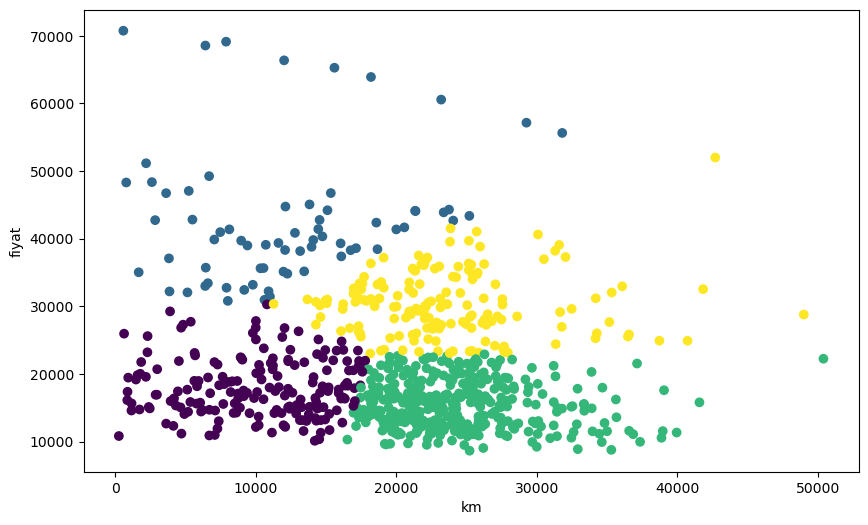

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=tahmin)
plt.xlabel('km')
plt.ylabel('fiyat')

In [17]:
## Elbow Metodu

In [18]:
# wcss = within cluster sum of squares

wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.4511454168958197
0.41321086914242133
0.41271030064254416
0.3544076887971194
0.36186917367474036
0.35856943781769274
0.35983849930805456
0.3700303637333222


In [19]:
# Bu yukardaki değerlerin değişimi bıraktığı noktada kaç gruba böleceğimize karar veriyoruz bu metodla buna karar veriyoruz Mesela 0.45,0.41,0.410.35,0.36 yani 4. değerde değişmeyi bırakıyor

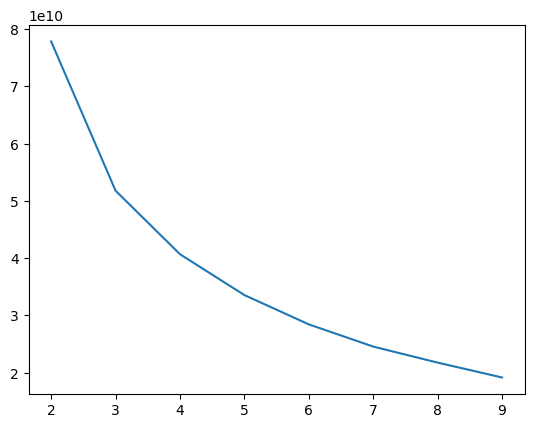

In [20]:
plt.plot(range(2,10),wcss)

In [21]:
# Grafiğin kırıldığı noktada datayı kaça bölmemiz gerektiğini belirliyebiliriz.

In [22]:
from yellowbrick.cluster import KElbowVisualizer

In [23]:
km=KMeans()

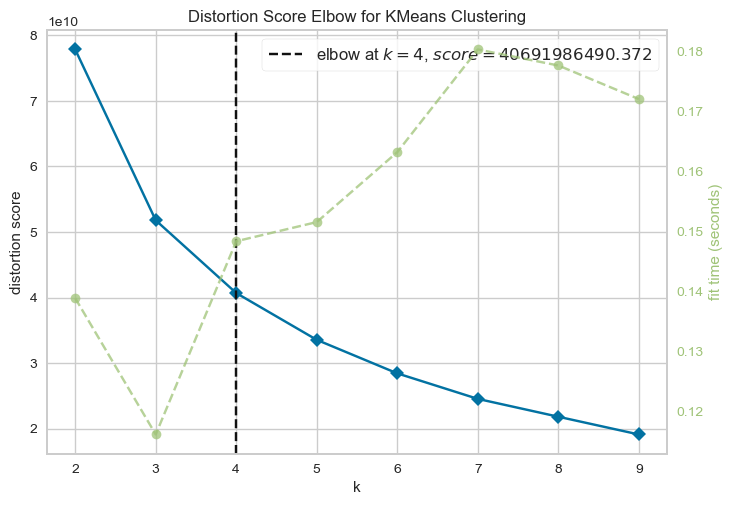

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
vis=KElbowVisualizer(km,k=(2,10))   # k değeri 2 den 10 a kadar olsun en az 2 den başlamalıyız
vis.fit(x)
vis.show()

In [25]:
# Bu grafikte kaç gruba bölmemiz gerektiğini daha net anlıyoruz direkt k=4 yazıyor

# Hierarchical Clustering

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
data  = linkage(x , method = 'ward' , metric = 'euclidean')

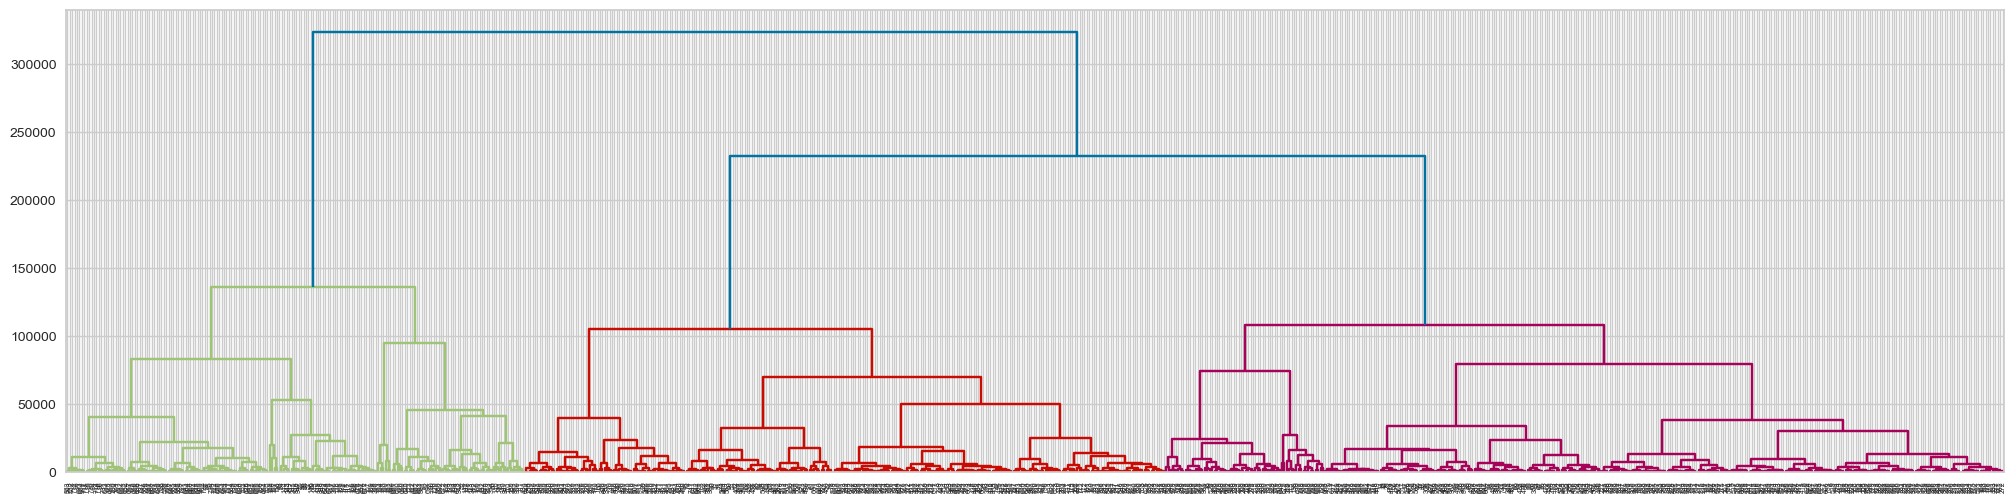

In [29]:
plt.figure(figsize= (25,6))
dendrogram(data);

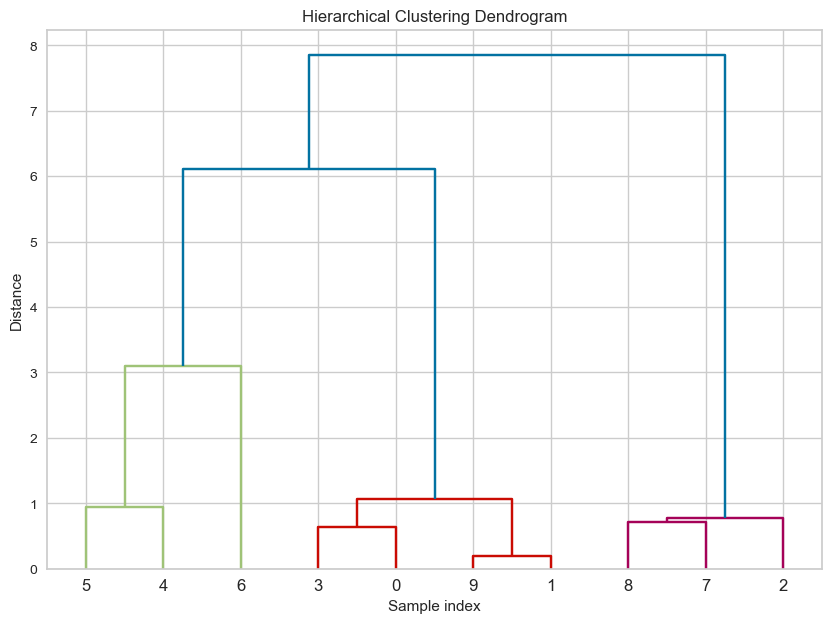

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample data
X, _ = make_blobs(n_samples=10, centers=3, cluster_std=0.60, random_state=0)

# Perform hierarchical clustering
linked = linkage(X, 'ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [31]:
from sklearn.cluster import DBSCAN # baska bir clustering algoritmasi

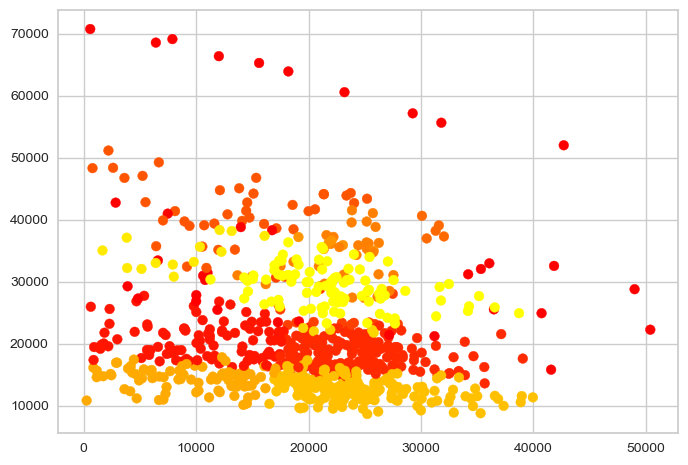

In [32]:
db = DBSCAN(min_samples= 5)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
x2=StandardScaler().fit_transform(x)
y=db.fit_predict(x2)

plt.scatter(x['Mileage'],x['Price'],c=y,cmap='autumn')

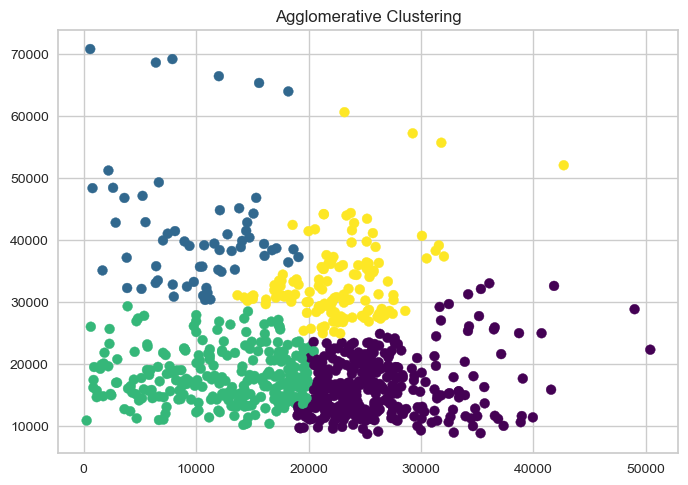

In [33]:

from sklearn.cluster import AgglomerativeClustering  ##

agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(x)

# Plot the results
plt.scatter(x.Mileage, x.Price, c=y_agg, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.show()
